<a href="https://colab.research.google.com/github/gregwalla/covid/blob/master/Parse_covid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stanford-cs329s.github.io/syllabus.html

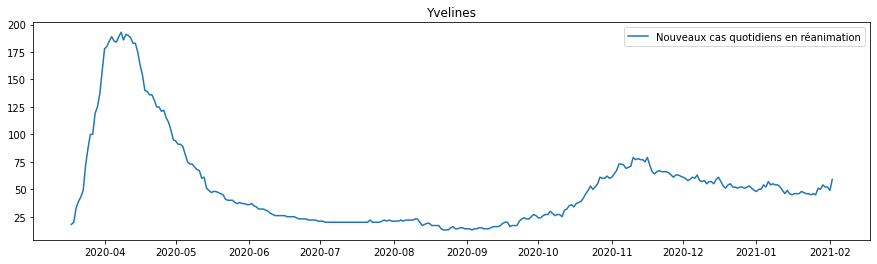

In [ ]:
import requests 
from json import loads
import pandas as pd
import matplotlib.pyplot as plt

#variables

#source1 : API

#GET all live data for any departement
api_url_jour = "https://coronavirusapi-france.now.sh/AllLiveData"

#GET all the data for a departement at any date
api_url_histo = 'https://coronavirusapi-france.now.sh/AllDataByDepartement?Departement=Yvelines'

#Données histo - tous départements 

r = requests.get(api_url_histo)
dic = loads(r.text)  
df = pd.DataFrame.from_dict(dic['allDataByDepartement'])


#Données du jour - tous départements 
#r = requests.get(api_url_jour)
#dic = loads(r.text)  
#df = pd.DataFrame.from_dict(dic['allLiveFranceData'])


#filtre departement

departement = 'Yvelines'

df.loc[df['nom'] == departement,:]


#Visualisation

df['date'] = pd.to_datetime(df['date']).dt.date

plt.figure(figsize = (15, 4))

x= df['date']
y= df['reanimation']

plt.title(departement)
plt.plot(x, y, label='Nouveaux cas quotidiens en réanimation')
plt.legend();


#Suggested Worklow : 


#Day D:

#Parse_covid_data 

#check data integrity

#model asses D-1 

#prepare for modeling  : 

    #option : add  population and geo dept coordinates

    #feature engineering options:
        #one hots 
        #last day
        #last 2 days
        #same day last week 
        #since 10 days confin
        #since 10 days couvrefeu
        #vaccinés
        #temps last 10 days
        #rain last 10 days
        #variant anglais 15 j 
        #fêtes 10 j

#model re-train (?)

#model fit 
    #rf regressor , y = nombre de cas rea, Prophet? 
    #simple regressor 

#model predict 
    #nombre de jours d'avance à décider

#model deploy
